In [16]:
import pandas as pd 

In [17]:
df = pd.read_csv(r'FINAL_FROM_DF.csv')

In [19]:
df.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,20MICRONS,EQ,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,2017-06-28,202,INE144J01027
1,3IINFOTECH,EQ,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,2017-06-28,7353,INE748C01020
2,3MINDIA,EQ,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,2017-06-28,748,INE470A01017
3,63MOONS,EQ,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,2017-06-28,437,INE111B01023
4,8KMILES,EQ,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,2017-06-28,1866,INE650K01021


In [20]:
df2 = df[['TIMESTAMP','CLOSE']]

In [21]:
df2

,TIMESTAMP,CLOSE
0,2017-06-28,36.85
1,2017-06-28,4.55
2,2017-06-28,13266.70
3,2017-06-28,61.00
4,2017-06-28,537.45
...,...,...
846399,2017-12-29,217.00
846400,2017-12-29,550.80
846401,2017-12-29,253.25
846402,2017-12-29,1043.20


In [22]:
df2['TIMESTAMP'] = pd.to_datetime(df2['TIMESTAMP'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_2204\1116359912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TIMESTAMP'] = pd.to_datetime(df2['TIMESTAMP'])


In [23]:
df2.head()

,TIMESTAMP,CLOSE
0,2017-06-28,36.85
1,2017-06-28,4.55
2,2017-06-28,13266.70
3,2017-06-28,61.00
4,2017-06-28,537.45


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846404 entries, 0 to 846403
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   TIMESTAMP  846404 non-null  datetime64[ns]
 1   CLOSE      846404 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.9 MB


In [28]:
df2.set_index('TIMESTAMP', inplace=True)

In [29]:
df2

,CLOSE
TIMESTAMP,
2017-06-28,36.85
2017-06-28,4.55
2017-06-28,13266.70
2017-06-28,61.00
2017-06-28,537.45
...,...
2017-12-29,217.00
2017-12-29,550.80
2017-12-29,253.25


In [30]:
import matplotlib.pyplot as plt

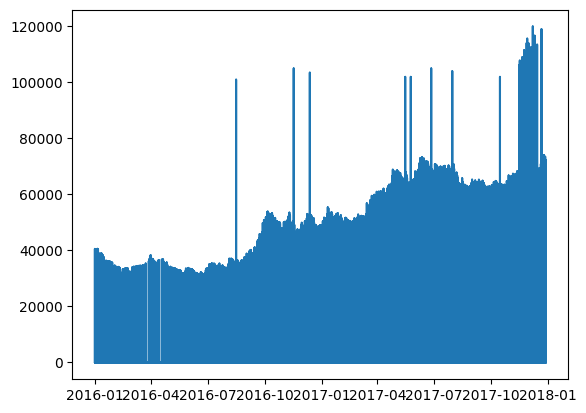

In [32]:
plt.plot(df2.index,df2['CLOSE'])

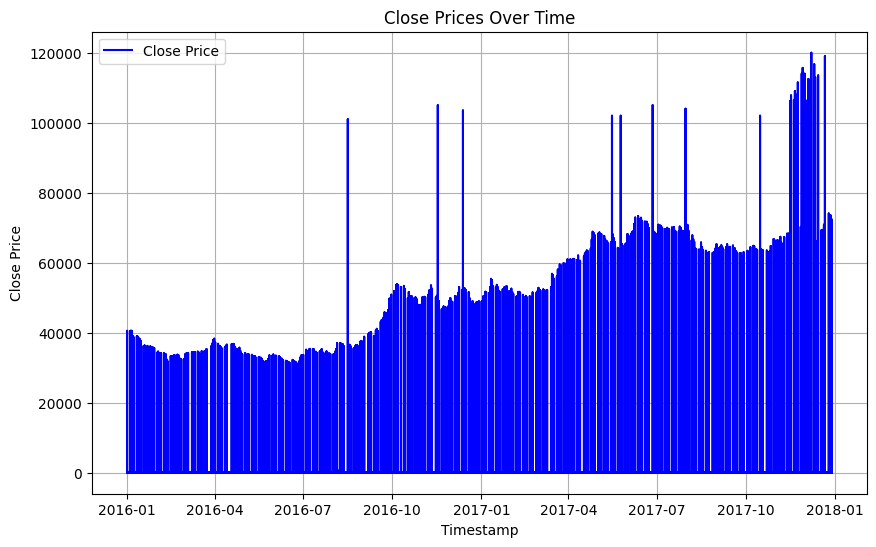

In [34]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 6))  # Optional: Customize figure size
plt.plot(df2.index, df2['CLOSE'], label='Close Price', color='blue')  # Use 'Close' (case-sensitive)
plt.title('Close Prices Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)  # Optional: Add grid for better readability
plt.show()


In [35]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()

In [36]:
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [37]:
df2

array([[3.06692352e-04],
       [3.75031409e-05],
       [1.10564676e-01],
       ...,
       [2.11017673e-03],
       [8.69364476e-03],
       [3.83365440e-05]])

In [38]:
training_size = int(len(df2)*0.70)
test_size = len(df2)-training_size
train_data , test_data = df2[0:training_size,:],df2[training_size:len(df2),:1]

In [42]:
import numpy

In [43]:
def create_dataset (dataset,time_step=1): 
    dataX,datay = [],[]
    for i in range(len(dataset)-time_step-1): 
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        datay.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(datay)     

In [44]:
time_step = 100 
X_train , y_train = create_dataset(train_data,time_step)
X_test , y_test = create_dataset(test_data,time_step)

In [45]:
print(X_train.shape) , print(y_train.shape)

(592381, 100)
(592381,)


(None, None)

In [48]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [49]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM 

In [50]:
model = Sequential() 
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1)) 
model.compile(loss='mean_squared_error',optimizer='adam')          

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=4,batch_size=64,verbose=1)

Epoch 1/4
9256/9256 ━━━━━━━━━━━━━━━━━━━━ 3297s 347ms/step - loss: 3.0809e-04 - val_loss: 1.9868e-04
Epoch 2/4
9256/9256 ━━━━━━━━━━━━━━━━━━━━ 30385s 3s/step - loss: 2.8815e-04 - val_loss: 1.9644e-04
Epoch 3/4
9256/9256 ━━━━━━━━━━━━━━━━━━━━ 4052s 438ms/step - loss: 3.0338e-04 - val_loss: 1.9177e-04
Epoch 4/4
9256/9256 ━━━━━━━━━━━━━━━━━━━━ 2426s 262ms/step - loss: 2.9976e-04 - val_loss: 1.8992e-04


In [53]:
model.evaluate(X_test,y_test)

7932/7932 ━━━━━━━━━━━━━━━━━━━━ 350s 44ms/step - loss: 1.8681e-04


0.000189918078831397